###*Sayantan Mukherjee 60009220131 D2-2*

In [ ]:
!pip install minisom matplotlib pandas scikit-learn


  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11706 sha256=4725ef283b57da1e6bfaa56a05e2671099ff3868de29141f34c57df0dcb2c623
  Stored in directory: /root/.cache/pip/wheels/96/98/a5/52dee3e8ed1dbfc4d77e4da41b6d89dd7ab9ead1b921e766f8
Successfully built minisom


In [6]:
import pandas as pd

df=pd.read_csv('/content/Credit_Card_Applications.csv')
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


###*Preprocessing data*

In [9]:
from sklearn.preprocessing import StandardScaler

# Drop 'customerID' and 'class' columns
data = df.drop(columns=['CustomerID', 'Class'])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pd.DataFrame(data_scaled, columns=data.columns).head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,0.688737,-0.801052,1.347111,0.542950,-0.916282,-0.347965,-0.190906,-1.047504,-0.864196,-0.493887,1.087908,0.237828,-0.488358,0.037380
1,-1.451933,-0.751240,0.450548,0.542950,0.170499,-0.347965,-0.615536,-1.047504,-0.864196,-0.493887,-0.919195,0.237828,-0.139591,-0.195413
2,-1.451933,-0.167856,-0.604823,-1.783978,-0.916282,-0.347965,-0.291083,-1.047504,-0.864196,-0.493887,1.087908,0.237828,0.557943,-0.195413
3,-1.451933,-0.835667,1.355152,-1.783978,-0.644587,-0.850257,-0.664877,0.954650,1.157144,1.769760,1.087908,0.237828,-1.069637,-0.195413
4,0.688737,-0.962306,0.685745,0.542950,-0.372892,-0.347965,-0.078768,0.954650,1.157144,2.387119,-0.919195,0.237828,-0.720870,-0.165066


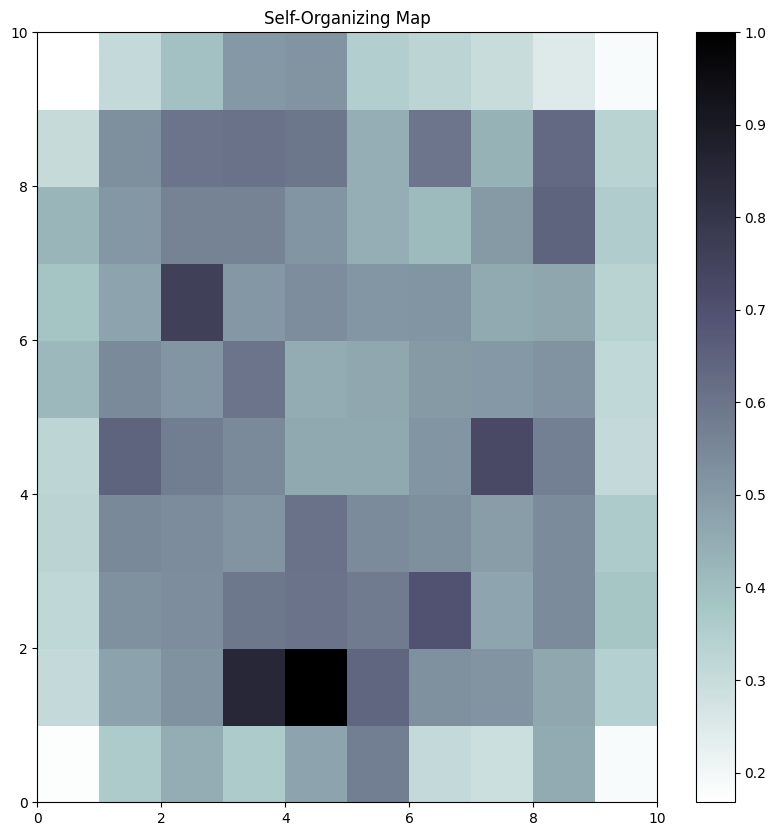

In [11]:
from minisom import MiniSom
import matplotlib.pyplot as plt

som = MiniSom(x=10, y=10, input_len=data_scaled.shape[1], sigma=1.0, learning_rate=0.5)

# Train the SOM
som.train_random(data_scaled, num_iteration=100)

# Visualize the SOM map
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

plt.title("Self-Organizing Map")
plt.show()


In [14]:
# Experiment with different parameters for SOM grid size and training
param_grid = {
    'x': [10, 15, 20],
    'y': [10, 15, 20],
    'sigma': [0.5, 1.0, 1.5],
    'learning_rate': [0.1, 0.5, 0.9]
}

for x in param_grid['x']:
    for y in param_grid['y']:
        for sigma in param_grid['sigma']:
            for learning_rate in param_grid['learning_rate']:
                som = MiniSom(x=x, y=y, input_len=data_scaled.shape[1], sigma=sigma, learning_rate=learning_rate)
                som.train_random(data_scaled, num_iteration=100)
                print(f"Trained SOM with x={x}, y={y}, sigma={sigma}, learning_rate={learning_rate}")


Trained SOM with x=10, y=10, sigma=0.5, learning_rate=0.1
Trained SOM with x=10, y=10, sigma=0.5, learning_rate=0.5
Trained SOM with x=10, y=10, sigma=0.5, learning_rate=0.9
Trained SOM with x=10, y=10, sigma=1.0, learning_rate=0.1
Trained SOM with x=10, y=10, sigma=1.0, learning_rate=0.5
Trained SOM with x=10, y=10, sigma=1.0, learning_rate=0.9
Trained SOM with x=10, y=10, sigma=1.5, learning_rate=0.1
Trained SOM with x=10, y=10, sigma=1.5, learning_rate=0.5
Trained SOM with x=10, y=10, sigma=1.5, learning_rate=0.9
Trained SOM with x=10, y=15, sigma=0.5, learning_rate=0.1
Trained SOM with x=10, y=15, sigma=0.5, learning_rate=0.5
Trained SOM with x=10, y=15, sigma=0.5, learning_rate=0.9
Trained SOM with x=10, y=15, sigma=1.0, learning_rate=0.1
Trained SOM with x=10, y=15, sigma=1.0, learning_rate=0.5
Trained SOM with x=10, y=15, sigma=1.0, learning_rate=0.9
Trained SOM with x=10, y=15, sigma=1.5, learning_rate=0.1
Trained SOM with x=10, y=15, sigma=1.5, learning_rate=0.5
Trained SOM wi

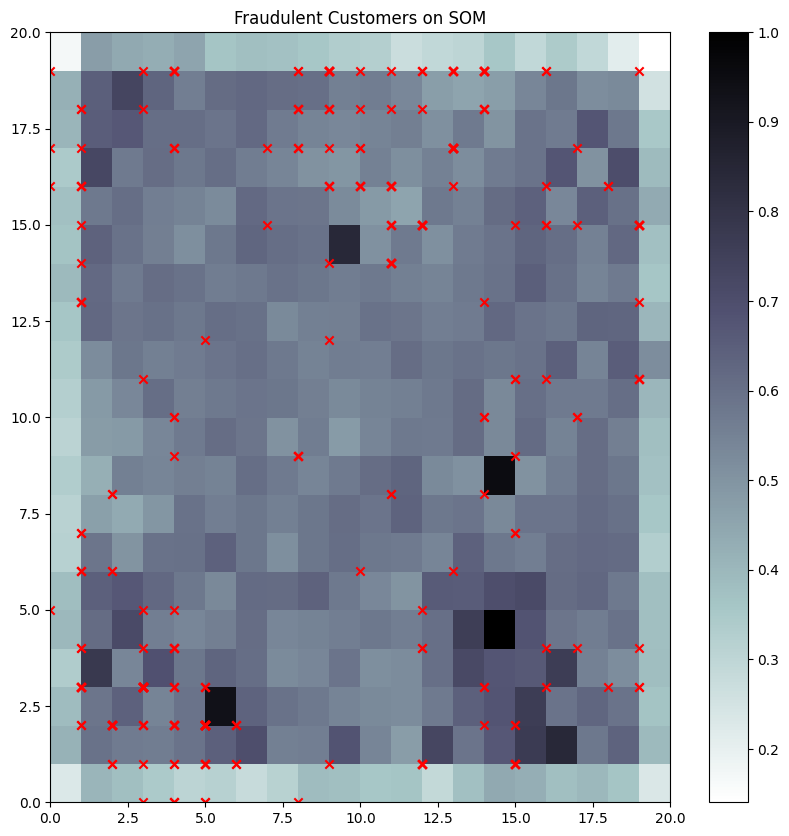

In [15]:
labels = pd.read_csv('/content/Credit_Card_Applications.csv')['Class']

# Identify fraudulent customers (class == 1 is typically fraud)
fraud = labels == 1

# Get the SOM's winning positions for each customer
win_map = som.win_map(data_scaled)

# Plot the SOM map with fraud points marked
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

for i, is_fraud in enumerate(fraud):
    if is_fraud:
        x, y = som.winner(data_scaled[i])
        plt.scatter(x, y, color='red', marker='x')

plt.title("Fraudulent Customers on SOM")
plt.show()


###*Here are some key applications of SOMs:*

Clustering and Data Visualization: SOMs can be used to group similar data points and visualize high-dimensional data in a lower-dimensional map.

Anomaly Detection: SOMs are often used in fraud detection and network intrusion detection, as they can identify outliers or unusual behavior in the data.

Image Recognition: SOMs are used for pattern recognition in images, including handwritten digit recognition.

Speech Recognition: SOMs can help classify audio signals into patterns that are easier to process.

Market Segmentation: By analyzing customer behavior, SOMs can help in identifying different market segments for targeted advertising.

###*Loss Function in SOM(Self-Organizing Maps)*

The loss function in SOMs isn’t exactly a traditional loss function, but the algorithm minimizes the distance between the input data vector and the "winning neuron" (the neuron in the SOM grid that is closest to the input vector). The adjustment of the weights in neighboring neurons depends on the distance from the winning neuron. The objective is to reduce this distance over time and organize the data map accordingly.

##Disadvantages of Kohonen Maps
Sensitive to Initialization: The initial weights can significantly impact the result, and SOMs require careful initialization of neurons.

High Computational Complexity: Training a SOM on a large dataset with many iterations can be computationally expensive.

Difficulty in Interpreting Large Maps: As the map size grows, it becomes more difficult to interpret the results visually.

Parameter Sensitivity: The quality of the SOM depends heavily on parameters like map size, sigma, and learning rate, which can require careful tuning.